## Problem 6 (20 Points)

This is a coding exercise. You are given a dataset `data.txt` containing $ n $ independent observations from an exponential distribution with an unknown parameter $ \lambda $. The probability density function for the exponential distribution is:

$$ f(x | \lambda) = \lambda e^{-\lambda x}, \quad x \geq 0 $$

### Tasks:

1. Load the dataset from the provided `data.txt` file and visualize the data using a histogram.  
   (Your submission should contain such a histogram).

2. Estimate the MLE for $ \lambda $ using the following steps:
   - Derive the log-likelihood function for the exponential distribution.
   - Write a Python function to compute the negative log-likelihood.
   - Use Python's `scipy.optimize.minimize` function to find the MLE for $ \lambda $.

3. Visualize the fit by plotting the histogram of the data along with the estimated probability density function (PDF) for the exponential distribution using your estimated $ \hat{\lambda} $.

4. Submit your code used for the analysis.


---

In [6]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize


### 1. Loading and Visualize dataset

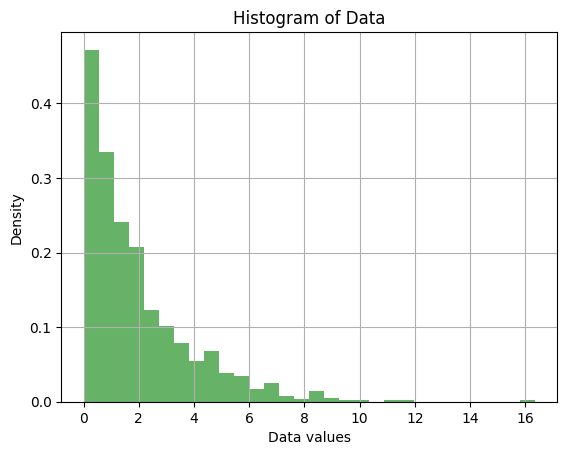

In [7]:
# Load the dataset from 'data.txt' file
data = np.loadtxt('data.txt')

# plot histogram
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histogram of Data')
plt.xlabel('Data values')
plt.ylabel('Density')
plt.grid()
plt.show()

### 2. Estimate MLE ($ \lambda $)

* Derive the log-likelihood function for the exponential distribution

In [8]:
# Derive the log-likelihood function for the exponential distribution
def log_likelihood(lmbda, data):
    if lmbda <= 0:  # λ must be positive
        return np.inf
    return -np.sum(np.log(lmbda * np.exp(-lmbda * data)))

# Function to compute the negative log-likelihood
def negative_log_likelihood(lmbda):
    return log_likelihood(lmbda, data)

# Use scipy's optimize.minimize function to find the MLE for λ
initial_guess = 1.0  # Initial guess for λ
result = optimize.minimize(negative_log_likelihood, initial_guess, bounds=[(1e-10, None)])
mle_lambda = result.x[0]

print(f"Estimated MLE for λ: {mle_lambda}")

Estimated MLE for λ: 0.5141357585302092


### 3. Visualizing fit

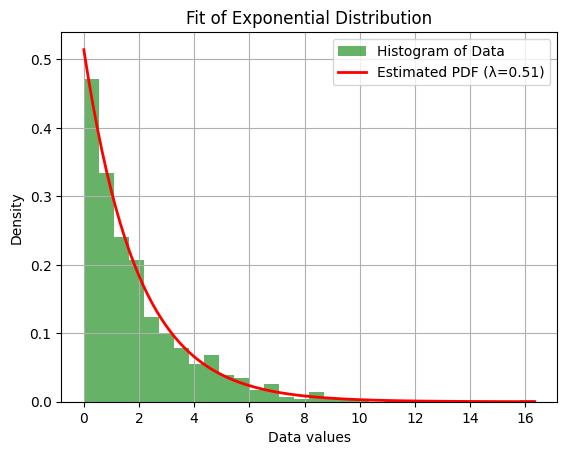

In [9]:
x = np.linspace(0, np.max(data), 100)
pdf = mle_lambda * np.exp(-mle_lambda * x)

# Plot histogram and PDF
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Histogram of Data')
plt.plot(x, pdf, 'r-', lw=2, label=f'Estimated PDF (λ={mle_lambda:.2f})')
plt.title('Fit of Exponential Distribution')
plt.xlabel('Data values')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()